In [1]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
from functions import generate_single_exp, stretch_exp_fit, double_exp_fit, single_exp_fit
import math
import pandas as pd
from scipy.stats import skewnorm

In C:\Users\sarth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\sarth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\sarth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate skewed normal random array of lifetime values

In [3]:
seed(10)
# tau_vals = randint(1,1000,100)*1e-9 # convert to s
# create a skewed noraml distribution
tau_vals = skewnorm.rvs(a = 10, loc = 50, scale=100, size=100) *1e-9

In [4]:
np.average(tau_vals)

1.245844614013999e-07

Text(0.5, 0, 'Tau values (ns)')

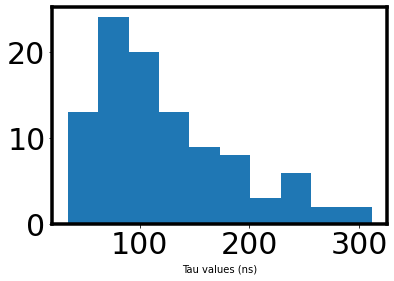

In [5]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [6]:
t = np.linspace(0,10000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

In [7]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

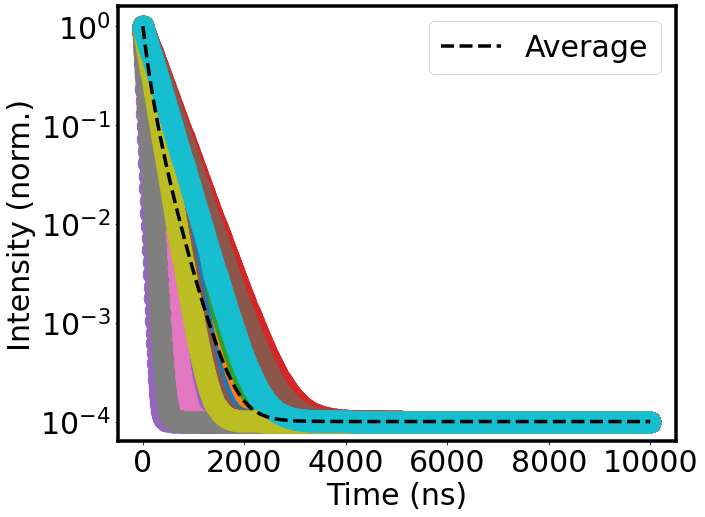

In [8]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Fit average decay with stretched exponential, double exponential and single exponential 

In [9]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 98.5159456911735
Beta = 0.7689616358854785
avg. tau (ns) = 114.97111768455186


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)


In [10]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 87.55048341046923
a1 = 0.6973835039837958
tau2 (ns) = 222.03496153411763
a2 = 0.28673566095326913
avg. tau (ns) = 126.73425006865213


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))


In [11]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 155.8761887811381
a = 0.8105661471035959
avg. tau (ns) = 155.8761887811381


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)) + noise)
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)) + noise)
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:132: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


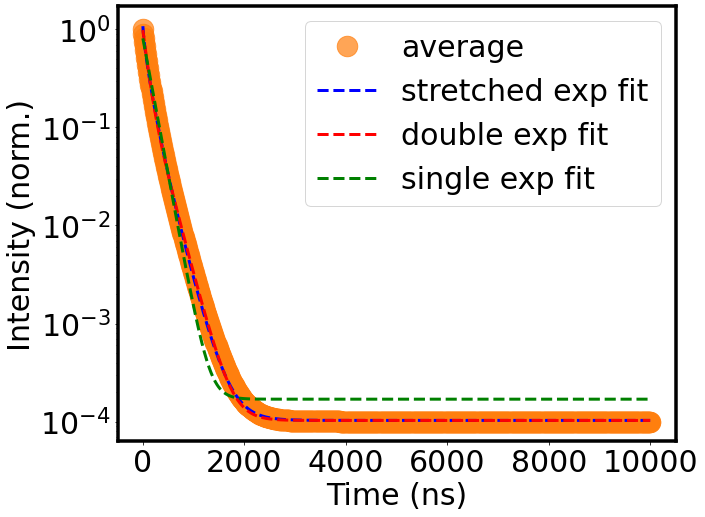

In [12]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Create a random np array of 20 lifetimes with values far apart from one another

In [12]:
tau_far = np.array([2, 955, 422, 49, 544, 245, 111, 643, 765, 976, 1002, 408, 87, 872, 175, 303, 645, 226, 677, 788])*1e-9

In [43]:
tau_far

array([2.000e-09, 9.550e-07, 4.220e-07, 4.900e-08, 5.440e-07, 2.450e-07,
       1.110e-07, 6.430e-07, 7.650e-07, 9.760e-07, 1.002e-06, 4.080e-07,
       8.700e-08, 8.720e-07, 1.750e-07, 3.030e-07, 6.450e-07, 2.260e-07,
       6.770e-07, 7.880e-07])

In [131]:
np.average(tau_far)

4.9475e-07

Text(0.5, 0, 'Tau values (ns)')

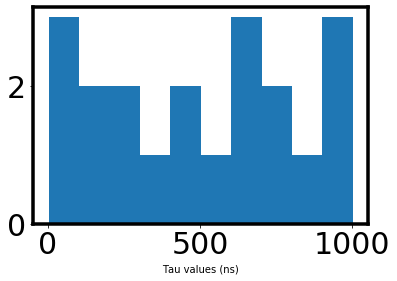

In [13]:
plt.figure()
plt.hist(tau_far*1e9)
plt.xlabel("Tau values (ns)")

### Take the average of all the single exponetial of each of the 20 lifetimes

In [223]:
t_far = np.linspace(0,10000,num=1000)*1e-9

In [15]:
I_values = []

for i in range(len(tau_far)):
    I_values.append(generate_single_exp(t_far,tau_far[i]))
    
I_values = np.asarray(I_values)
I_average = np.average(I_values,axis=0)

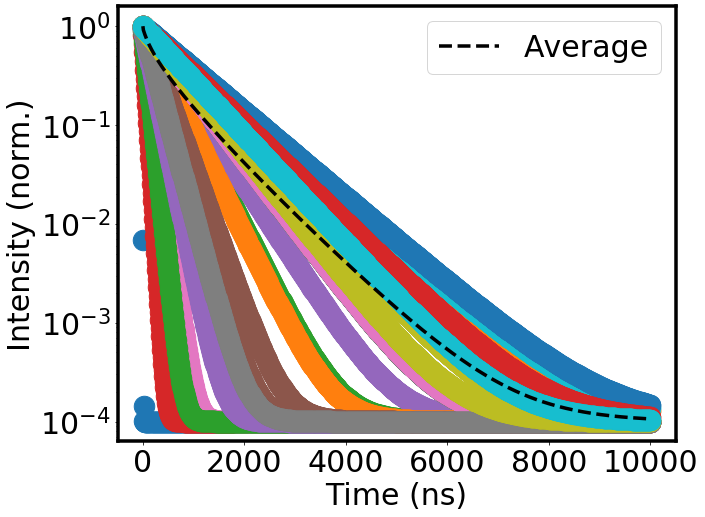

In [25]:
plt.figure(figsize=(10,8))
for i in range(len(tau_far)):
    plt.plot(t_far*1e9,I_values[i],'o')
plt.plot(t_far*1e9,I_average,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [18]:
far_stretched_exp = stretch_exp_fit(I_average/np.max(I_average), t_far)
print("tau_c (ns) = "+str(far_stretched_exp[0]*1e9))
print("Beta = "+str(far_stretched_exp[1]))
print("avg. tau (ns) = "+str(far_stretched_exp[3]*1e9))

tau_c (ns) = 455.46825631390044
Beta = 0.7753045179424234
avg. tau (ns) = 528.1776716999125


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [19]:
far_double_exp = double_exp_fit(I_average/np.max(I_average), t_far)
print("tau1 (ns) = "+str(far_double_exp[0]*1e9))
print("a1 = "+str(far_double_exp[1]))
print("tau2 (ns) = "+str(far_double_exp[2]*1e9))
print("a2 = "+str(far_double_exp[3]))
print("avg. tau (ns) = "+str(far_double_exp[4]*1e9))

tau1 (ns) = 225.72993518166192
a1 = 0.4257323475921203
tau2 (ns) = 821.0612539015992
a2 = 0.48599089810038254
avg. tau (ns) = 543.069219464393


In [20]:
far_single_exp = single_exp_fit(I_average/np.max(I_average), t_far)
print("tau (ns) = "+str(far_single_exp[0]*1e9))
print("a = "+str(far_single_exp[1]))
print("avg. tau (ns) = "+str(far_single_exp[2]*1e9))

tau (ns) = 692.3991105111563
a = 0.7182040865746182
avg. tau (ns) = 692.3991105111563


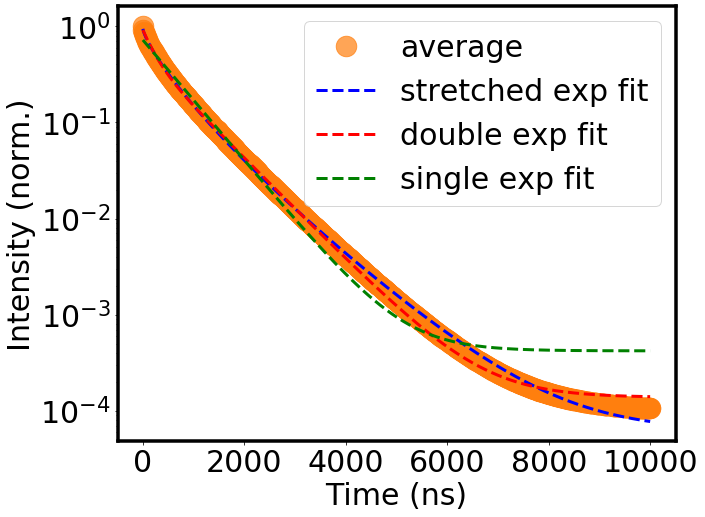

In [21]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t_far*1e9, I_average/np.max(I_average),'C1o', alpha=0.7,label="average")
plt.plot(t_far*1e9, far_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_far*1e9, far_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_far*1e9, far_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Calculate the SRV for each lifetime of the 20 data series

From *Jian, Sarthak, ACS Energy Lett. 2019, 4, 222−227* I took the equation to calculate the SRV.

The average tau I calculated above is the same as the tau effective of the paper. This means that is equal to the sum of the reciprocal of the lifetime in the bulk and in the surface:

$\frac{1}{\tau_{eff}}$ = $\frac{1}{\tau_{b}}$ + $\frac{1}{\tau_{s}}$

The $\tau_{s}$ comes to play in the surface recombination velocity calculation along with *W* (thickness) and *D* (diffusion constant) 

*D* can be measured by the Einstein relationship: 

$D = \mu\cdot K_{b}\cdot T$

Where *$\mu$* is the measured carrier mboility values. 

There are two equations used to calculate SRV which describe two different device cases:

**1) $SRV_{1}$ is approximated to zero**

when the SRV on one contact is much greater than the other one on the other contact

$\tau_{s}$ = $\frac{W}{SRV_{2}}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

**1) $SRV_{1}$ = $SRV_{2}$ is approximated to zero**

SRV at the top and the bottom interfaces are the same

$\tau_{s}$ = $\frac{W}{2SRV}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

I considered the values of the previous studied films of *$Cs_{17}Br_{15}$* :

- $\mu$ = 35 $cm^2 V^{-1} s^{-1}$
- $D$ = 0.9 $cm^2 s^{-1}$
- $W$ = 400 $nm$ = 0.00004 $cm$

Approaches to calculate $\tau_{b}$ : 

1) One approach to determine $\tau_{b}$  is to measure and extrapolate $\tau_{b}$ from a very thick sample series  where bulk recombination dominates over surface recombination. 

2) The second approach is the Lewis base passivation using TOPO on MAPI which only bound the surface. For this reason, all the remaining recomination that decrease the PLQE is due to the bulk. 
This method allows us to establish a lower limit for the corresponding bulk lifetime ($\tau_{b}$  > 8 μ s) because surface passivation alone can restore well-prepared samples to such levels of performance. 

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

In [65]:
tau_eff = tau_far

In [117]:
tau_eff

array([2.000e-09, 9.550e-07, 4.220e-07, 4.900e-08, 5.440e-07, 2.450e-07,
       1.110e-07, 6.430e-07, 7.650e-07, 9.760e-07, 1.002e-06, 4.080e-07,
       8.700e-08, 8.720e-07, 1.750e-07, 3.030e-07, 6.450e-07, 2.260e-07,
       6.770e-07, 7.880e-07])

In [99]:
tau_bulk = 8*1e-6

In [100]:
tau_surf = (tau_eff * tau_bulk)/(tau_bulk - tau_eff)

In [101]:
tau_surf

array([2.00050013e-09, 1.08445706e-06, 4.45500132e-07, 4.93019746e-08,
       5.83690987e-07, 2.52740168e-07, 1.12561795e-07, 6.99198043e-07,
       8.45888044e-07, 1.11161731e-06, 1.14547013e-06, 4.29926238e-07,
       8.79565272e-08, 9.78675645e-07, 1.78913738e-07, 3.14927894e-07,
       7.01563562e-07, 2.32570105e-07, 7.39587601e-07, 8.74098724e-07])

In [102]:
def SRV_eq1(tau_surf):
    srv = 0.00004/(tau_surf - ((4/0.9)*(math.pow((0.00004/3.14), 2))))
    return srv

In [103]:
SRV1 = []
for i in tau_surf:
    srv = SRV_eq1(i)
    SRV1.append(srv)
SRV1

[31268.00738046398,
 36.90936397697014,
 89.93232475413186,
 823.3716121524884,
 68.61419483746376,
 158.71823574623528,
 357.6520079172517,
 57.26747071753413,
 47.32793535100812,
 36.006968525430615,
 34.942160768510185,
 93.19555904424568,
 458.5300286434366,
 40.90170223718238,
 224.4763378629754,
 127.30475038255689,
 57.074178567289735,
 172.52618186589493,
 54.13698874373394,
 45.79921121437001]

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

In [104]:
def SRV_eq2(tau_surf):
    srv = 0.00004/(2*(tau_surf - ((4/0.9)*(math.pow((0.00004/3.14), 2)))))
    return srv

In [105]:
SRV2 = []
for i in tau_surf:
    srv = SRV_eq2(i)
    SRV2.append(srv)
SRV2

[15634.00369023199,
 18.45468198848507,
 44.96616237706593,
 411.6858060762442,
 34.30709741873188,
 79.35911787311764,
 178.82600395862585,
 28.633735358767066,
 23.66396767550406,
 18.003484262715308,
 17.471080384255092,
 46.59777952212284,
 229.2650143217183,
 20.45085111859119,
 112.2381689314877,
 63.652375191278445,
 28.537089283644868,
 86.26309093294746,
 27.06849437186697,
 22.899605607185006]

- Calculating the average of the SRV calculated in equation one and two

In [106]:
np.average(SRV1,axis=0)

1712.6347296886347

In [107]:
np.average(SRV2,axis=0)

856.3173648443174

- Calculating SRV from the average of the tau_eff array

In [108]:
tau_math_avg = np.average(tau_surf, axis=0)
tau_math_avg

5.435323093430857e-07

In [109]:
SRV_eq1(5.435323093430857e-07)

73.6904644338937

In [110]:
SRV_eq2(5.435323093430857e-07)

36.84523221694685

#### SRV from average tau of streched exponential fitting:

avg. tau (ns) = 528.1776716999125 

avg. tau (s) = 5.282e-7 

In [120]:
def avg_tau_surf(avg_tau):
    return (avg_tau * 8e-6)/(8e-6 - avg_tau)

In [121]:
avg_tau_surf(5.282e-7)

5.655397628416178e-07

In [122]:
SRV_eq1(5.655397628416178e-07)

70.81920686012883

In [123]:
SRV_eq2(5.655397628416178e-07)

35.409603430064415

#### SRV from average tau of double exponential fitting:

Avg. tau (ns) = 543.069219464393

Avg. tau (s) = 5.431e-7

In [124]:
avg_tau_surf(5.431e-7)

5.826549906797731e-07

In [125]:
SRV_eq1(5.826549906797731e-07)

68.73634630486352

In [126]:
SRV_eq2(5.826549906797731e-07)

34.36817315243176

#### SRV from average tau of single exponential fitting:

Avg. tau (ns) = 692.3991105111563

Avg. tau (s) = 6.924e-7

In [127]:
avg_tau_surf(6.924e-7)

7.580053642782856e-07

In [128]:
SRV_eq1(7.580053642782856e-07)

52.82033331226244

In [129]:
SRV_eq2(7.580053642782856e-07)

26.41016665613122

### Conclusion:

From the SRV results we can see that the most accurate approximation is given by the streched exponential fitting

## Gaussian Distribution of lifetimes

#### Generate a Gaussian distribution with mean = 40 or 200 and a standard deviation of 10 or 50 ns

$
  P(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
$

In [174]:
def normal_p(x, mu, sigma):
    
    part1 = 1 / math.sqrt(2*math.pi*math.pow(sigma,2))
    part2 = math.exp(-1*math.pow((x-mu),2)/2/math.pow(sigma,2))
    probability = part1 * part2
    return probability

In [231]:
y = [normal_p(x, 40, 10) for x in np.arange(0, 80)]

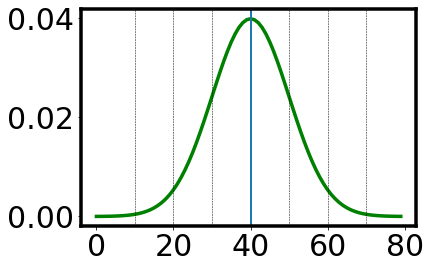

In [233]:
plt.plot(np.arange(0, 80), y, c='g')
plt.xticks(np.arange(0, 81, 20))
plt.axvline(x=40, linewidth = 2)
plt.axvline(x=50, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=30, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=60, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=20, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=70, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=10, linewidth = 0.5, color='k', ls='--')

In [259]:
y2 = [normal_p(x, 200, 50) for x in np.arange(0, 400)]

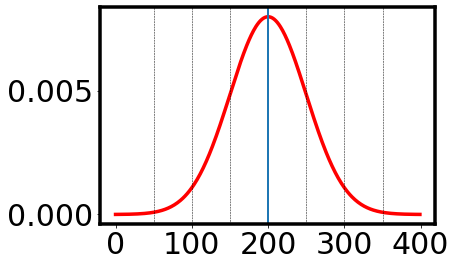

In [263]:
plt.plot(np.arange(0, 400), y2, c='r')
plt.xticks(np.arange(0, 401, 100))
plt.axvline(x=200, linewidth = 2)
plt.axvline(x=250, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=150, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=300, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=100, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=350, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=50, linewidth = 0.5, color='k', ls='--')

### 1) Gaussian distribution: mean = 40 ns , standard deviation = 10 ns , size = 1000

In [234]:
d1 = np.random.normal(loc=40, scale=10, size=1000)

In [235]:
gaussd1 = pd.DataFrame(data=d1, columns=['lifetime'])

In [236]:
gaussd1

,lifetime
0,39.909754
1,38.820620
2,66.242858
3,30.566169
4,31.414364
...,...
995,42.601483
996,53.176158
997,44.461498
998,35.521864


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15289dfb10>]],
      dtype=object)

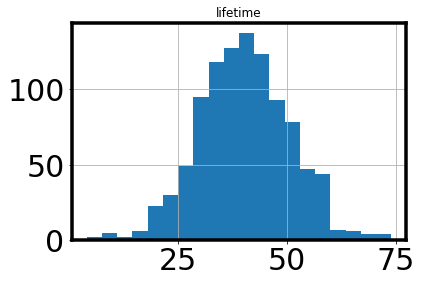

In [237]:
gaussd1.hist(bins=20)

In [238]:
d1_s = d1*1e-9

In [283]:
np.average(d1_s)

4.023985721581998e-08

In [245]:
t_gauss= np.linspace(0, 1000, num= 1000)*1e-9

In [252]:
I_gauss = []

for i in range(len(d1_s)):
    I_gauss.append(generate_single_exp(t_gauss,d1_s[i]))
    
I_gauss = np.asarray(I_gauss)
I_avg_gauss = np.average(I_gauss,axis=0)

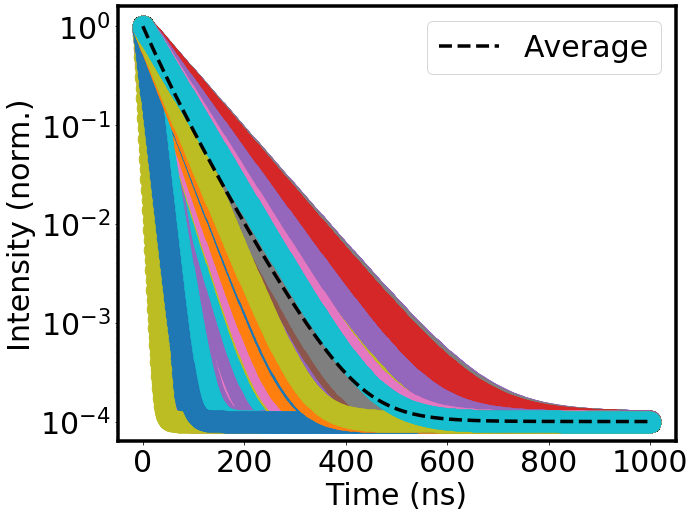

In [253]:
plt.figure(figsize=(10,8))
for i in range(len(d1_s)):
    plt.plot(t_gauss*1e9,I_gauss[i],'o')
plt.plot(t_gauss*1e9,I_avg_gauss,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [255]:
gauss_stretched_exp = stretch_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau_c (ns) = "+str(gauss_stretched_exp[0]*1e9))
print("Beta = "+str(gauss_stretched_exp[1]))
print("avg. tau (ns) = "+str(gauss_stretched_exp[3]*1e9))

tau_c (ns) = 37.603828759360994
Beta = 0.9169295767144388
avg. tau (ns) = 39.173736632910185


In [256]:
gauss_double_exp = double_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau1 (ns) = "+str(gauss_double_exp[0]*1e9))
print("a1 = "+str(gauss_double_exp[1]))
print("tau2 (ns) = "+str(gauss_double_exp[2]*1e9))
print("a2 = "+str(gauss_double_exp[3]))
print("avg. tau (ns) = "+str(gauss_double_exp[4]*1e9))

tau1 (ns) = 31.23093481324268
a1 = 0.5366004797400139
tau2 (ns) = 51.29827098248761
a2 = 0.4576564551079266
avg. tau (ns) = 40.467929409695046


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))


In [257]:
gauss_single_exp = single_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau (ns) = "+str(gauss_single_exp[0]*1e9))
print("a = "+str(gauss_single_exp[1]))
print("avg. tau (ns) = "+str(gauss_single_exp[2]*1e9))

tau (ns) = 42.756192338527036
a = 0.9420196652422872
avg. tau (ns) = 42.756192338527036


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In this case, the most accurate fitting is the one with a double exponential and looking at the average tau, the actual average tau is around 40.24 and the error of the double exponential is of only +0.24 

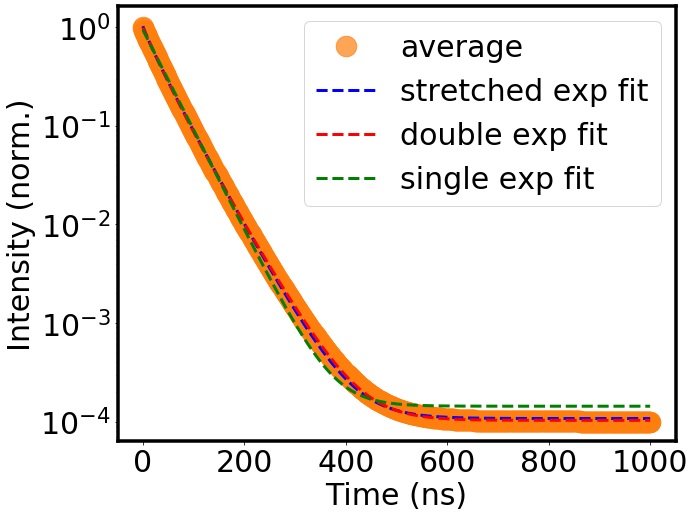

In [284]:
plt.figure(figsize=(10,8))
plt.plot(t_gauss*1e9, I_avg_gauss/np.max(I_avg_gauss),'C1o', alpha=0.7,label="average")
plt.plot(t_gauss*1e9, gauss_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_gauss*1e9, gauss_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_gauss*1e9, gauss_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### 2) Gaussian distribution: mean = 200 ns , standard deviation = 50 ns , size = 1000

In [264]:
d2 = np.random.normal(loc=200, scale=50, size=1000)

In [265]:
gaussd2 = pd.DataFrame(data=d2, columns=['lifetime'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x153745ea50>]],
      dtype=object)

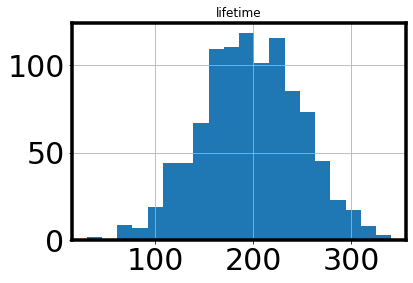

In [267]:
gaussd2.hist(bins=20)

In [268]:
d2_s = d2*1e-9

In [281]:
np.average(d2_s)

1.973875062733631e-07

In [276]:
t_gauss2= np.linspace(0, 5000, num= 1000)*1e-9

In [277]:
I_gauss2 = []

for i in range(len(d2_s)):
    I_gauss2.append(generate_single_exp(t_gauss2,d2_s[i]))
    
I_gauss2 = np.asarray(I_gauss2)
I_avg_gauss2 = np.average(I_gauss2,axis=0)

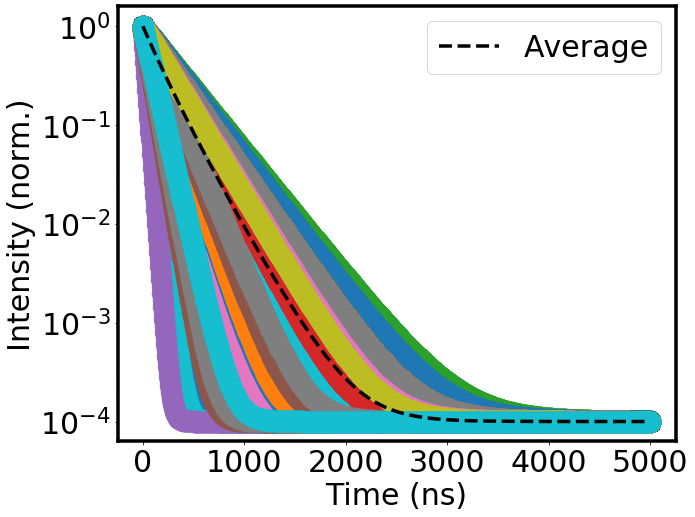

In [278]:
plt.figure(figsize=(10,8))
for i in range(len(d2_s)):
    plt.plot(t_gauss2*1e9,I_gauss2[i],'o')
plt.plot(t_gauss2*1e9,I_avg_gauss2,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [279]:
gauss2_stretched_exp = stretch_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau_c (ns) = "+str(gauss2_stretched_exp[0]*1e9))
print("Beta = "+str(gauss2_stretched_exp[1]))
print("avg. tau (ns) = "+str(gauss2_stretched_exp[3]*1e9))

tau_c (ns) = 184.70082031404522
Beta = 0.9181901122147098
avg. tau (ns) = 192.27383675468073


In [280]:
gauss2_double_exp = double_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau1 (ns) = "+str(gauss2_double_exp[0]*1e9))
print("a1 = "+str(gauss2_double_exp[1]))
print("tau2 (ns) = "+str(gauss2_double_exp[2]*1e9))
print("a2 = "+str(gauss2_double_exp[3]))
print("avg. tau (ns) = "+str(gauss2_double_exp[4]*1e9))

tau1 (ns) = 248.0492850787927
a1 = 0.4908821228429284
tau2 (ns) = 149.80879910896832
a2 = 0.5046455234145764
avg. tau (ns) = 198.24994334366542


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [282]:
gauss2_single_exp = single_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau (ns) = "+str(gauss2_single_exp[0]*1e9))
print("a = "+str(gauss2_single_exp[1]))
print("avg. tau (ns) = "+str(gauss2_single_exp[2]*1e9))

tau (ns) = 209.7308620181496
a = 0.9415071145929726
avg. tau (ns) = 209.7308620181496


Also in this case the best fitting function is the double exponential: avg.tau from double exp = 198.25 , avg.tau = 197.39

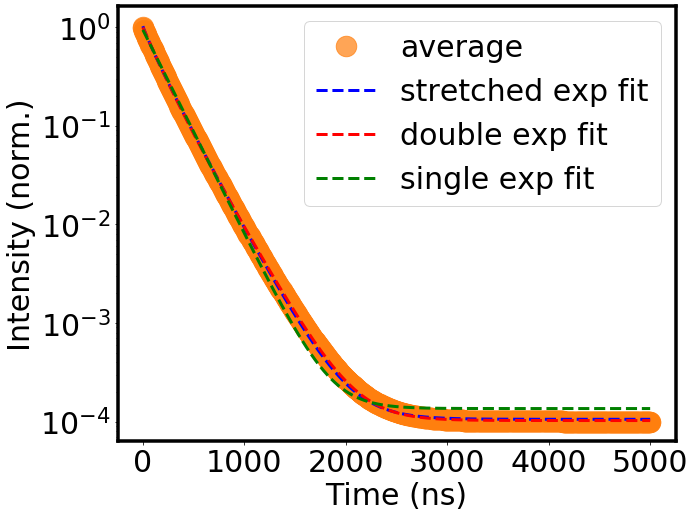

In [285]:
plt.figure(figsize=(10,8))
plt.plot(t_gauss2*1e9, I_avg_gauss2/np.max(I_avg_gauss2),'C1o', alpha=0.7,label="average")
plt.plot(t_gauss2*1e9, gauss2_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_gauss2*1e9, gauss2_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_gauss2*1e9, gauss2_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

## Poisson distribution of lifetimes

$
  P(k)=\frac{\lambda^k e^{-\lambda}}{k!}
$

$\lambda$ is the expected number of occurrences

For events with an expected separation $\lambda$ the Poisson distribution P(k) describes the probability of k events occurring within the observed interval $\lambda$.

Because the output is limited to the range of the C long type, a ValueError is raised when $\lambda$ is within 10 sigma of the maximum representable value.

In [380]:
def poisson_p(lamb, k):
    probability = math.pow(lamb, k) * math.exp(-lamb) / math.factorial(k)
    return probability

In [356]:
poisson_p(10, 100)

4.864649182067611e-63

In [357]:
poisson_p(50, 100)

1.6303193521477302e-10

In [358]:
p_y = [poisson_p(50, k) for k in np.arange(0, 100)]
p_y2 = [poisson_p(10, k) for k in np.arange(0, 100)]

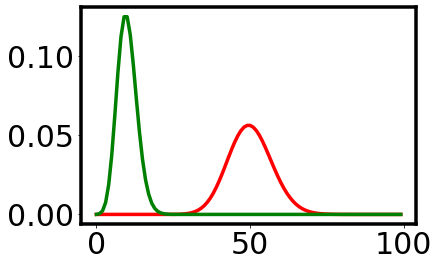

In [360]:
plt.plot(np.arange(0, 100), p_y, c='r')
plt.plot(np.arange(0, 100), p_y2, c='g')

In [294]:
tau_poisson = np.random.poisson(50, 100)

In [296]:
poiss = pd.DataFrame(data=tau_poisson, columns=['lifetime'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x153dbc9290>]],
      dtype=object)

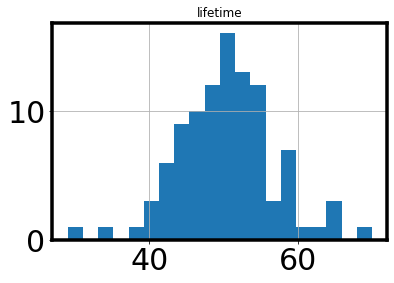

In [300]:
poiss.hist(bins=20)

In [301]:
tau_poisson_s = tau_poisson*1e-9

In [302]:
np.average(tau_poisson_s)

5.033e-08

In [315]:
t_poiss= np.linspace(0, 1000, num= 1000)*1e-9

In [316]:
I_poiss = []

for i in range(len(tau_poisson_s)):
    I_poiss.append(generate_single_exp(t_poiss,tau_poisson_s[i]))
    
I_poiss = np.asarray(I_poiss)
I_avg_poiss = np.average(I_poiss,axis=0)

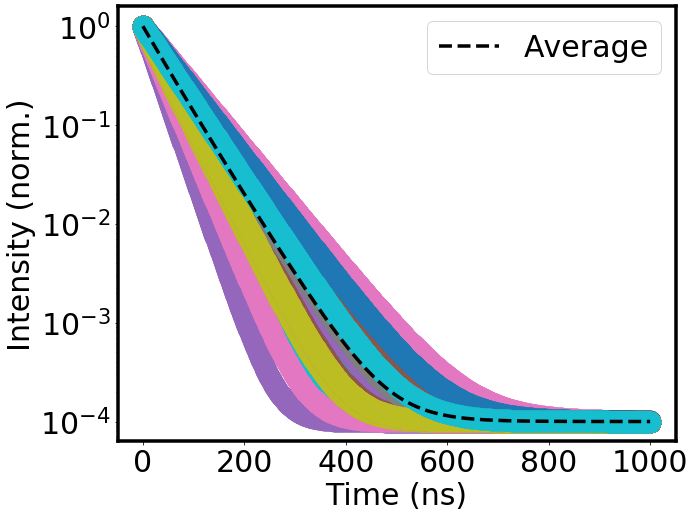

In [317]:
plt.figure(figsize=(10,8))
for i in range(len(tau_poisson_s)):
    plt.plot(t_poiss*1e9,I_poiss[i],'o')
plt.plot(t_poiss*1e9,I_avg_poiss,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [318]:
poiss_stretched_exp = stretch_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau_c (ns) = "+str(poiss_stretched_exp[0]*1e9))
print("Beta = "+str(poiss_stretched_exp[1]))
print("avg. tau (ns) = "+str(poiss_stretched_exp[3]*1e9))

tau_c (ns) = 49.3425049936261
Beta = 0.9757955966973633
avg. tau (ns) = 49.87252960953485


In [319]:
poiss_double_exp = double_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau1 (ns) = "+str(poiss_double_exp[0]*1e9))
print("a1 = "+str(poiss_double_exp[1]))
print("tau2 (ns) = "+str(poiss_double_exp[2]*1e9))
print("a2 = "+str(poiss_double_exp[3]))
print("avg. tau (ns) = "+str(poiss_double_exp[4]*1e9))

tau1 (ns) = 44.56597957802868
a1 = 0.5440381802442369
tau2 (ns) = 57.264371024216565
a2 = 0.4554092249345776
avg. tau (ns) = 50.352141587614014


In [320]:
poiss_single_exp = single_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau (ns) = "+str(poiss_single_exp[0]*1e9))
print("a = "+str(poiss_single_exp[1]))
print("avg. tau (ns) = "+str(poiss_single_exp[2]*1e9))

tau (ns) = 51.08104367152622
a = 0.9853478589792659
avg. tau (ns) = 51.08104367152622


Also for the poisson distribution of lifetimes, the better fitting is with the double exponential where tau_avg is 50.35 and the effective one is 50.33 ns

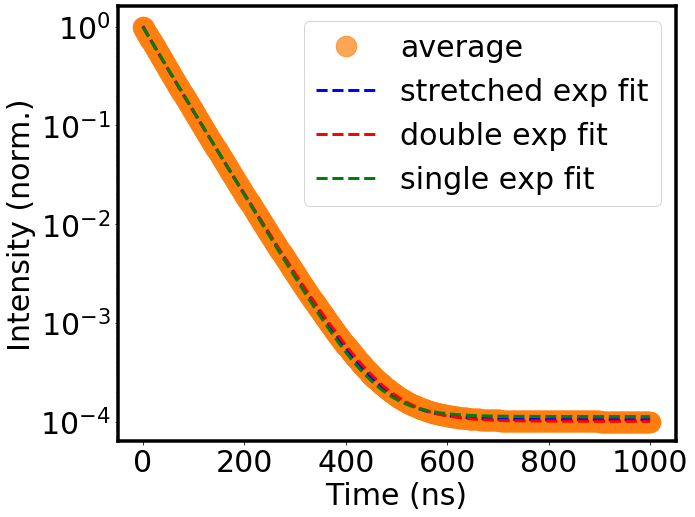

In [321]:
plt.figure(figsize=(10,8))
plt.plot(t_poiss*1e9, I_avg_poiss/np.max(I_avg_poiss),'C1o', alpha=0.7,label="average")
plt.plot(t_poiss*1e9, poiss_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_poiss*1e9, poiss_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_poiss*1e9, poiss_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Poisson distribution with lambda = 10 and k = 100 

In [370]:
tau_poisson2 = np.random.poisson(10, 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1541ff2850>]],
      dtype=object)

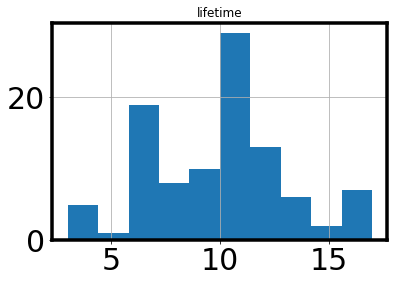

In [373]:
poiss2 = pd.DataFrame(data=tau_poisson2, columns=['lifetime'])

poiss2.hist(bins=10)

In [374]:
tau_poisson2_s = tau_poisson2*1e-9

np.average(tau_poisson2_s)

9.820000000000001e-09

In [381]:
t_poiss2= np.linspace(0, 1000, num= 1000)*1e-9

I_poiss2 = []

for i in range(len(tau_poisson2_s)):
    I_poiss2.append(generate_single_exp(t_poiss2,tau_poisson2_s[i]))
    
I_poiss2 = np.asarray(I_poiss2)
I_avg_poiss2 = np.average(I_poiss2,axis=0)

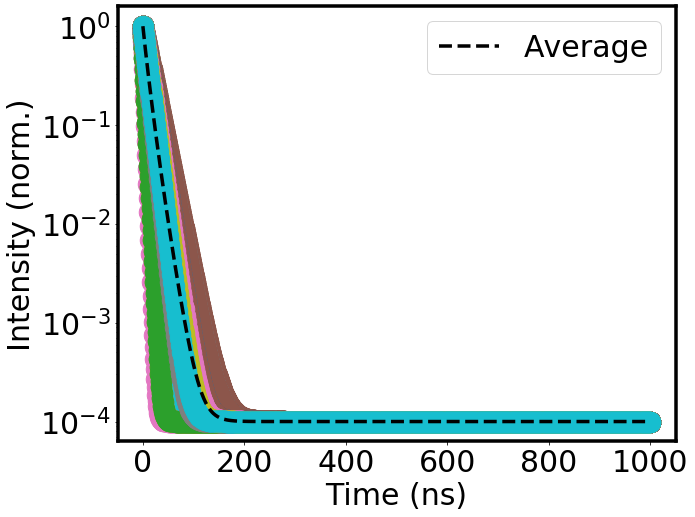

In [382]:
plt.figure(figsize=(10,8))
for i in range(len(tau_poisson2_s)):
    plt.plot(t_poiss2*1e9,I_poiss2[i],'o')
plt.plot(t_poiss2*1e9,I_avg_poiss2,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [383]:
poiss2_stretched_exp = stretch_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau_c (ns) = "+str(poiss2_stretched_exp[0]*1e9))
print("Beta = "+str(poiss2_stretched_exp[1]))
print("avg. tau (ns) = "+str(poiss2_stretched_exp[3]*1e9))

tau_c (ns) = 8.987040443578277
Beta = 0.8891730707467537
avg. tau (ns) = 9.519702137771993


In [384]:
poiss2_double_exp = double_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau1 (ns) = "+str(poiss2_double_exp[0]*1e9))
print("a1 = "+str(poiss2_double_exp[1]))
print("tau2 (ns) = "+str(poiss2_double_exp[2]*1e9))
print("a2 = "+str(poiss2_double_exp[3]))
print("avg. tau (ns) = "+str(poiss2_double_exp[4]*1e9))

tau1 (ns) = 13.440282018646329
a1 = 0.41059288833738405
tau2 (ns) = 7.38622407397491
a2 = 0.5826644164194114
avg. tau (ns) = 9.888851666805124


In [385]:
poiss2_single_exp = single_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau (ns) = "+str(poiss2_single_exp[0]*1e9))
print("a = "+str(poiss2_single_exp[1]))
print("avg. tau (ns) = "+str(poiss2_single_exp[2]*1e9))

tau (ns) = 10.751462591049714
a = 0.9179980377452551
avg. tau (ns) = 10.751462591049714


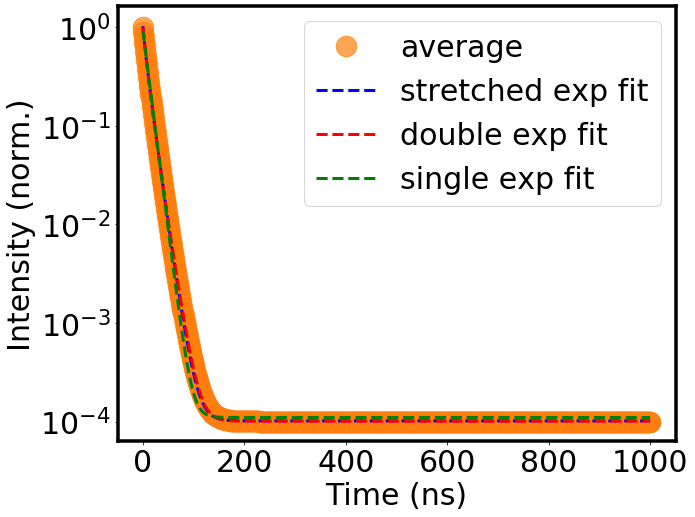

In [386]:
plt.figure(figsize=(10,8))
plt.plot(t_poiss2*1e9, I_avg_poiss2/np.max(I_avg_poiss2),'C1o', alpha=0.7,label="average")
plt.plot(t_poiss2*1e9, poiss2_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_poiss2*1e9, poiss2_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_poiss2*1e9, poiss2_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

Also in this case, the double exponential is better fitting the average function giving a value of tau_avg: 9.89 ns (Vs 9.82 ns)